In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e59812eddd80a035ba092901a601131


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto nacional
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | manokwari
Processing Record 9 of Set 1 | hammerfest
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | san vicente
Processing Record 18 of Set 1 | baijiantan
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | los palacios
Processing Record 21 

Processing Record 40 of Set 4 | tsiroanomandidy
Processing Record 41 of Set 4 | timbiqui
Processing Record 42 of Set 4 | meulaboh
Processing Record 43 of Set 4 | ambon
Processing Record 44 of Set 4 | terrace
Processing Record 45 of Set 4 | grand centre
City not found. Skipping...
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | merauke
Processing Record 48 of Set 4 | salisbury
Processing Record 49 of Set 4 | pontes e lacerda
Processing Record 50 of Set 4 | atka
City not found. Skipping...
Processing Record 1 of Set 5 | montepuez
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | qaanaaq
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | moerai
Processing Record 8 of Set 5 | kargasok
Processing Record 9 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 5 | santa eulalia del rio
City not fou

Processing Record 25 of Set 8 | katsuura
Processing Record 26 of Set 8 | daru
Processing Record 27 of Set 8 | joshimath
Processing Record 28 of Set 8 | nanortalik
Processing Record 29 of Set 8 | luanda
Processing Record 30 of Set 8 | dharchula
Processing Record 31 of Set 8 | fuerte olimpo
Processing Record 32 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 8 | saldanha
Processing Record 34 of Set 8 | tabukiniberu
City not found. Skipping...
Processing Record 35 of Set 8 | chimore
Processing Record 36 of Set 8 | salamiyah
Processing Record 37 of Set 8 | svetlyy
Processing Record 38 of Set 8 | nokaneng
Processing Record 39 of Set 8 | rafsanjan
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | nabire
Processing Record 42 of Set 8 | miri
Processing Record 43 of Set 8 | naryan-mar
Processing Record 44 of Set 8 | baghpat
Processing Record 45 of Set 8 | mrirt
City not found. Skipping...
Processing Record 46 of Set 8 | razdolinsk
Proce

City not found. Skipping...
Processing Record 10 of Set 12 | ligayan
Processing Record 11 of Set 12 | kralendijk
Processing Record 12 of Set 12 | maningrida
Processing Record 13 of Set 12 | vicente guerrero
Processing Record 14 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 15 of Set 12 | poum
Processing Record 16 of Set 12 | hokitika
Processing Record 17 of Set 12 | buala
Processing Record 18 of Set 12 | aswan
Processing Record 19 of Set 12 | yatou
Processing Record 20 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set 12 | ankang
Processing Record 22 of Set 12 | pacific grove
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | abonnema
Processing Record 25 of Set 12 | casper
Processing Record 26 of Set 12 | nishihara
Processing Record 27 of Set 12 | college
Processing Record 28 of Set 12 | midland
Processing Record 29 of Set 12 | tairua
Processing Record 30 of Set 12 | tucuman
Processing Record 31 of S

In [7]:
len(city_data)

570

In [8]:
print(city_data)

[{'City': 'Porto Nacional', 'Lat': -10.71, 'Lng': -48.42, 'Max Temp': 80.6, 'Humidity': 69, 'Cloudiness': 20, 'Wind Speed': 4.7, 'Country': 'BR', 'Date': '2020-11-09 02:22:57'}, {'City': 'Rikitea', 'Lat': -23.12, 'Lng': -134.97, 'Max Temp': 72.99, 'Humidity': 78, 'Cloudiness': 100, 'Wind Speed': 15.23, 'Country': 'PF', 'Date': '2020-11-09 02:22:57'}, {'City': 'Castro', 'Lat': -24.79, 'Lng': -50.01, 'Max Temp': 64.58, 'Humidity': 68, 'Cloudiness': 43, 'Wind Speed': 6.44, 'Country': 'BR', 'Date': '2020-11-09 02:22:43'}, {'City': 'Atuona', 'Lat': -9.8, 'Lng': -139.03, 'Max Temp': 77.68, 'Humidity': 64, 'Cloudiness': 74, 'Wind Speed': 12.53, 'Country': 'PF', 'Date': '2020-11-09 02:22:58'}, {'City': 'Tuktoyaktuk', 'Lat': 69.45, 'Lng': -133.04, 'Max Temp': 14, 'Humidity': 92, 'Cloudiness': 75, 'Wind Speed': 8.05, 'Country': 'CA', 'Date': '2020-11-09 02:22:58'}, {'City': 'Carnarvon', 'Lat': -24.87, 'Lng': 113.63, 'Max Temp': 71.6, 'Humidity': 60, 'Cloudiness': 90, 'Wind Speed': 12.75, 'Countr

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Porto Nacional,-10.71,-48.42,80.60,69,20,4.70,BR,2020-11-09 02:22:57
1,Rikitea,-23.12,-134.97,72.99,78,100,15.23,PF,2020-11-09 02:22:57
2,Castro,-24.79,-50.01,64.58,68,43,6.44,BR,2020-11-09 02:22:43
3,Atuona,-9.80,-139.03,77.68,64,74,12.53,PF,2020-11-09 02:22:58
4,Tuktoyaktuk,69.45,-133.04,14.00,92,75,8.05,CA,2020-11-09 02:22:58
5,Carnarvon,-24.87,113.63,71.60,60,90,12.75,AU,2020-11-09 02:22:58
6,Ribeira Grande,38.52,-28.70,61.16,65,46,13.22,PT,2020-11-09 02:22:58
7,Manokwari,-0.87,134.08,85.06,67,100,9.82,ID,2020-11-09 02:22:58
8,Hammerfest,70.66,23.68,39.20,92,75,40.26,NO,2020-11-09 02:22:58
9,Lompoc,34.64,-120.46,53.60,66,75,12.75,US,2020-11-09 02:22:42


In [10]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Nacional,BR,2020-11-09 02:22:57,-10.71,-48.42,80.60,69,20,4.70
1,Rikitea,PF,2020-11-09 02:22:57,-23.12,-134.97,72.99,78,100,15.23
2,Castro,BR,2020-11-09 02:22:43,-24.79,-50.01,64.58,68,43,6.44
3,Atuona,PF,2020-11-09 02:22:58,-9.80,-139.03,77.68,64,74,12.53
4,Tuktoyaktuk,CA,2020-11-09 02:22:58,69.45,-133.04,14.00,92,75,8.05
5,Carnarvon,AU,2020-11-09 02:22:58,-24.87,113.63,71.60,60,90,12.75
6,Ribeira Grande,PT,2020-11-09 02:22:58,38.52,-28.70,61.16,65,46,13.22
7,Manokwari,ID,2020-11-09 02:22:58,-0.87,134.08,85.06,67,100,9.82
8,Hammerfest,NO,2020-11-09 02:22:58,70.66,23.68,39.20,92,75,40.26
9,Lompoc,US,2020-11-09 02:22:42,34.64,-120.46,53.60,66,75,12.75


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

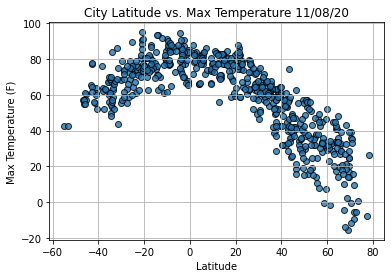

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


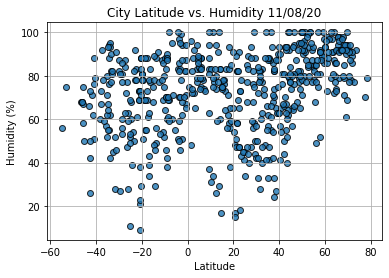

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

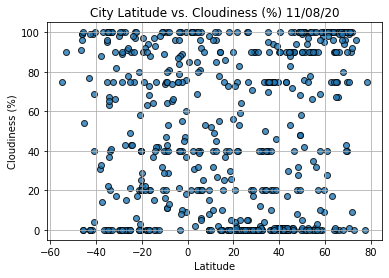

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

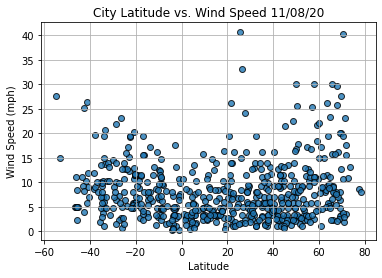

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [18]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2020-11-09 02:20:24
Lat                          42.6
Lng                        -73.97
Max Temp                    53.01
Humidity                       93
Cloudiness                      1
Wind Speed                   2.17
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [20]:
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Tuktoyaktuk,CA,2020-11-09 02:22:58,69.45,-133.04,14.00,92,75,8.05
6,Ribeira Grande,PT,2020-11-09 02:22:58,38.52,-28.70,61.16,65,46,13.22
8,Hammerfest,NO,2020-11-09 02:22:58,70.66,23.68,39.20,92,75,40.26
9,Lompoc,US,2020-11-09 02:22:42,34.64,-120.46,53.60,66,75,12.75
10,Torbay,CA,2020-11-09 02:22:59,47.67,-52.73,34.00,68,20,11.41
13,Albany,US,2020-11-09 02:20:24,42.60,-73.97,53.01,93,1,2.17
15,Baijiantan,CN,2020-11-09 02:23:01,45.63,85.18,42.19,57,72,7.11
16,Los Palacios,CU,2020-11-09 02:23:01,22.59,-83.25,74.71,91,53,7.25
17,Pevek,RU,2020-11-09 02:23:01,69.70,170.31,16.86,94,100,3.36
18,Raahe,FI,2020-11-09 02:20:02,64.68,24.48,36.00,74,0,5.82


In [21]:
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Nacional,BR,2020-11-09 02:22:57,-10.71,-48.42,80.60,69,20,4.70
1,Rikitea,PF,2020-11-09 02:22:57,-23.12,-134.97,72.99,78,100,15.23
2,Castro,BR,2020-11-09 02:22:43,-24.79,-50.01,64.58,68,43,6.44
3,Atuona,PF,2020-11-09 02:22:58,-9.80,-139.03,77.68,64,74,12.53
5,Carnarvon,AU,2020-11-09 02:22:58,-24.87,113.63,71.60,60,90,12.75
7,Manokwari,ID,2020-11-09 02:22:58,-0.87,134.08,85.06,67,100,9.82
11,Ushuaia,AR,2020-11-09 02:18:57,-54.80,-68.30,42.80,56,75,27.51
12,Cape Town,ZA,2020-11-09 02:22:59,-33.93,18.42,53.01,62,20,4.70
14,San Vicente,AR,2020-11-09 02:23:01,-26.62,-54.13,72.75,47,91,2.71
19,Mataura,NZ,2020-11-09 02:23:01,-46.19,168.86,57.00,68,96,5.01


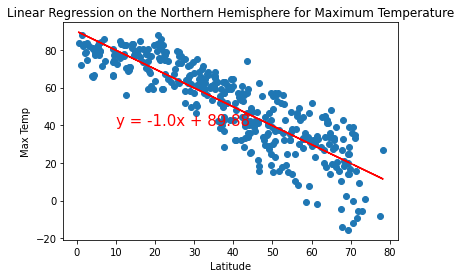

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

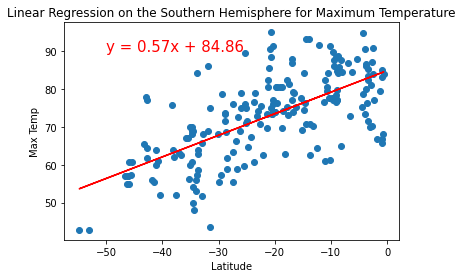

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

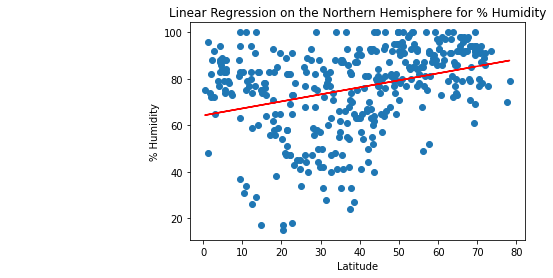

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(-50,15))

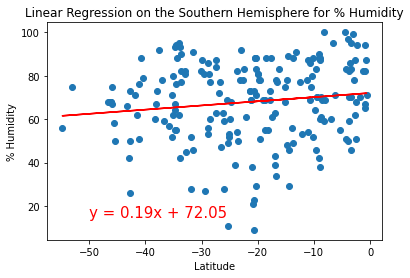

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


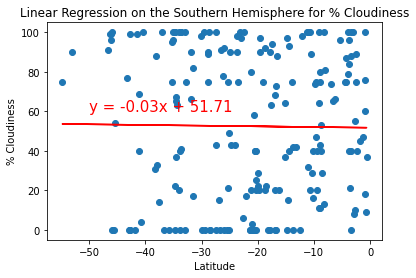

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

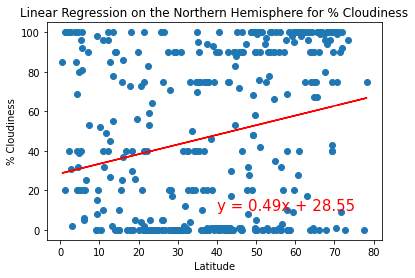

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

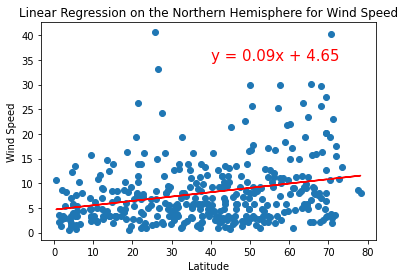

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))


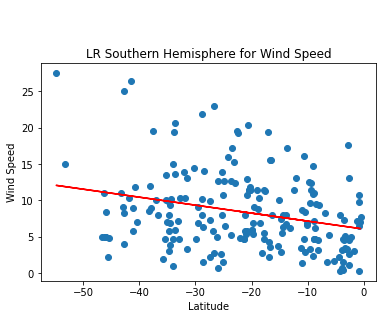

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'LR Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))